# **Task - 1: Implementation of MCP Neurons:**

**Question - 1: List out all the limitations of MCP - Neurons.**


*   MCP neurons only handle binary inputs and outputs
*   They cannot learn, they rely on hand-tuned threshold values.
*   MCP neurons cannot model complex decision boundaries as they are only capable of solving linearly separable problems.
*   They cannot implement XOR logic without additional layers.
*   They do not support learning from data, as weights are not trainable.


**Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron. {Can you devise a if else rules.}**



*   The XOR function is not linearly separable, meaning MCP neurons alone cannot model it directly.
*   However, using multiple MCP neurons, we can implement XOR as a combination of AND, OR, and NOT : XOR(A,B)=(AORB)AND(NOT(AANDB))
*   This requires multiple layers, which goes beyond the capabilities of a single MCP neuron.



# **Task 2: Perceptron Algorithm for 0 vs 1 Classification.**

**Question - 1: What does the shape of X represent?**


*   The shape of X represents the number of samples and features (pixels). If the shape is (m,784), it means we have m samples, each with 784 features (28x28 pixel images).



**Question - 2: What does the shape of y represent?**


*   The shape of y represents the number of labels, which should match the number of rows in X, meaning y has m elements.



**Question - 3: What does the weights array represent in this context?**


*   The weights array represents the importance of each pixel in the decision-making process.

**Question - 4: Why are we initializing the weights to zero? What effect could this have on the training process?**


*   Initializing weights to zero makes the learning process symmetric, meaning all neurons will update in the same way.
*   In practice, small random initialization is preferred to prevent symmetry issues.



**Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?**


*   It calculates the weighted sum of inputs, which is then passed through an activation function to make a prediction.


**Question - 6: What happens when the prediction is wrong? How are the weights and bias updated?**

*   If the prediction is wrong, the weights and bias are adjusted based on the difference between the actual and predicted values, scaled by a learning rate. This update helps refine the decision boundary, improving the model's ability to classify data correctly over time.

**Question - 7:Why is the final accuracy important, and what do you expect it to be?**


*   Final accuracy indicates how well the perceptron has learned the classification task.
*   It should ideally be close to 100% for a simple binary classification problem like distinguishing 0s and 1s.



**Question - 8:What does misclassified idx store, and how is it used in this code?**


*   It stores the indices where the predicted label differs from the true label.
*   It is used to plot the misclassified images.



**Question - 9: How do you interpret the result if the output is ”All images were correctly classified!”?**


*   The model has perfectly separated the two classes using a linear decision boundary.



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Implementing MCP Neuron for AND and OR functions
def MCP_Neurons_AND(X1, X2, T):
    state_neuron = [(1 if (x1 + x2) >= T else 0) for x1, x2 in zip(X1, X2)]
    return state_neuron

def MCP_Neurons_OR(X1, X2, T):
    state_neuron = [(1 if (x1 + x2) >= T else 0) for x1, x2 in zip(X1, X2)]
    return state_neuron

# Test MCP Neuron for AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T_AND = 2  # Threshold for AND
T_OR = 1   # Threshold for OR

and_result = MCP_Neurons_AND(X1, X2, T_AND)
or_result = MCP_Neurons_OR(X1, X2, T_OR)

# Implementing Perceptron for 0 vs 1 Classification
def decision_function(X, weights, bias):
    return np.where(np.dot(X, weights) + bias >= 0, 1, 0)

def train_perceptron(X, y, learning_rate=0.1, epochs=100):
    weights = np.zeros(X.shape[1])  # Initialize weights
    bias = 0  # Initialize bias

    for epoch in range(epochs):
        for i in range(len(y)):
            output = np.dot(X[i], weights) + bias
            y_pred = 1 if output >= 0 else 0

            # Update if prediction is incorrect
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)

    return weights, bias

#Load dataset for 0 vs 1 classification
df_0_1 = pd.read_csv("/content/drive/MyDrive/AI&ML --- Level 6 /Datasets/mnist_0_and_1.csv")
X = df_0_1.drop(columns=["label"]).values
y = df_0_1["label"].values

#train the perceptron
weights, bias = train_perceptron(X, y)

# Outputs
print("The result of AND function and OR functions are:")
and_result , or_result

The result of AND function and OR functions are:


([0, 0, 0, 1], [0, 1, 1, 1])

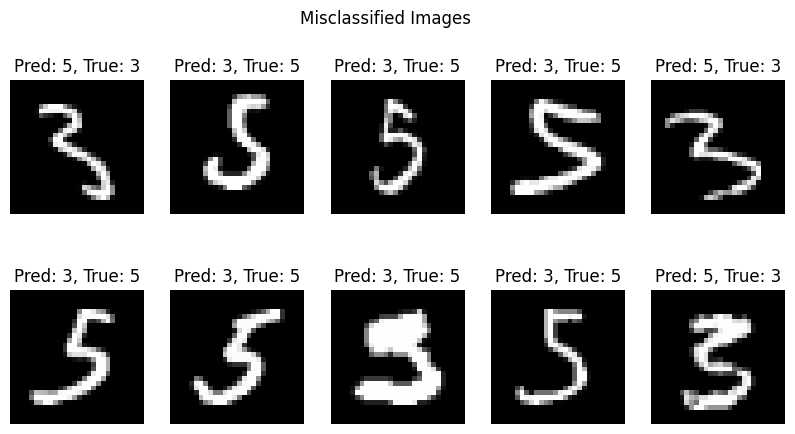

Perceptron model implemented for 3 vs 5 classification with visualization setup.


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def train_perceptron_3_vs_5(X, y, learning_rate=0.1, epochs=100):
    weights = np.zeros(X.shape[1])  # Initialize weights
    bias = 0  # Initialize bias

    for epoch in range(epochs):
        for i in range(len(y)):
            output = np.dot(X[i], weights) + bias
            y_pred = 1 if output >= 0 else 0

            # Update if prediction is incorrect
            if y_pred != y[i]:
                weights += learning_rate * (y[i] - y_pred) * X[i]
                bias += learning_rate * (y[i] - y_pred)

    return weights, bias

# Load dataset
df_3_5 = pd.read_csv("/content/drive/MyDrive/AI&ML --- Level 6 /Datasets/mnist_3_and_5.csv")
X_3_5 = df_3_5.drop(columns=["label"]).values
y_3_5 = df_3_5["label"].values

# Convert labels to binary (3 = 0 and 5 = 1)
y_3_5 = np.where(y_3_5 == 5, 1, 0)

# Train model
weights_3_5, bias_3_5 = train_perceptron_3_vs_5(X_3_5, y_3_5)

def visualize_misclassified(X, y, weights, bias):
    predictions = np.dot(X, weights) + bias
    y_pred = np.where(predictions >= 0, 1, 0)

    misclassified_idx = np.where(y_pred != y)[0]

    if len(misclassified_idx) > 0:
        fig, axes = plt.subplots(2, 5, figsize=(10, 5))

        for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show up to 10 misclassified images
            ax.imshow(X[idx].reshape(28, 28), cmap="gray")

            pred_label = 5 if y_pred[idx] == 1 else 3
            true_label = 5 if y[idx] == 1 else 3

            ax.set_title(f"Pred: {pred_label}, True: {true_label}")
            ax.axis("off")

        plt.suptitle("Misclassified Images")
        plt.show()
    else:
        print("All images were correctly classified!")

# Visualize misclassified images
visualize_misclassified(X_3_5, y_3_5, weights_3_5, bias_3_5)

print("Perceptron model implemented for 3 vs 5 classification with visualization setup.")